Quantum teleporation allows the transmutation of one half of an entangled Bell state, $| q_B\rangle$, held by the reciever Bob to an arbitrary qubit state, $|q_t\rangle$, held by the sender Alice. Alice holds the other half of the the engtagled Bell state, $|q_A\rangle$. During the quantum teleporation proccess the stat of the qubit that is "teleported" is destroyed, so the no cloning theory is not violated because at any given time there is only one qubit in state $|q_t\rangle$.

Quantum teleporatio is in a sense the inverse problem of superdense coding (see notebook), here we send classical bits in order to recreate a qubit. With superdense coding we send qubits to recreate classical information.

In [30]:
!pip install -U -r packages.txt

from IPython.display import clear_output
clear_output()

In [31]:
from qiskit import * 
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector 
from numpy import pi 

## QISKIT can connect to IBM quantum computers over the cloud with the qiskit.provider library but I found that
## job ques usuly take upwards of 30 minutes so I will just use the pre-built quantum simulators (these are also noiseless)
sim_state = Aer.get_backend("statevector_simulator")
sim_count = Aer.get_backend("qasm_simulator")


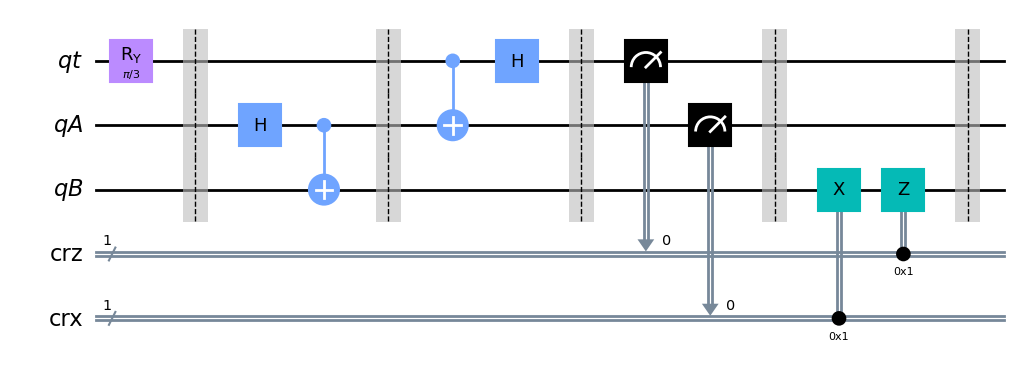

In [32]:
# initialize 3-qubit circuit with named registers
# held by Alice 
qt = QuantumRegister(1, name="qt") # state to be teleported 
qA = QuantumRegister(1, name="qA") # Alice's engtagled Bell state

# held by Bob
qB = QuantumRegister(1, name="qB") # Bob's entagled Bell state

# classical bits that are sent from Alice to Bob
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")

# initialise circuit of quantum and classical registers 
circuit = QuantumCircuit(qt, qA, qB, crz, crx)

# initialise the qubit to be teleported
circuit.ry(pi/3, qt) # rotate qubit 
#circuit.x(qt)

circuit.barrier()


# make qA and qB and entagled bell state 
circuit.h(qA)
circuit.cnot(qA, qB)
circuit.barrier()

# Alice performs the measuremnt on her qubits, qA and qt

# de-entagle bell state 
circuit.cnot(qt, qA)
circuit.h(qt)
circuit.barrier()
# measure both qubits that alice holds
circuit.measure(qt, crz)
circuit.measure(qA, crx)
circuit.barrier()

# measurements outcomes are sent through a classical communication 
# channel to bob, and he preforms opetations on qB contingent on the 
# outcoume of Alice's measurements


# idk why it won't draw the final sections using the standard pyton if statements, 
# but it seems to work fine

# if crx == 1:
#     circuit.x(qB)

# if crz == 1:
#     circuit.z(qB)

# there are qiskit if statements that seem to work for classical registers
# it drewas the proper circuit diagram this way
circuit.x(qB).c_if(crx, 1)  # apply X gate if cr_x is 1
circuit.z(qB).c_if(crz, 1)  # apply Z gate if cr_z is 1
    
circuit.barrier()

circuit.draw(output="mpl")

In [33]:
statevector = execute(circuit, backend=sim_state).result().get_statevector()


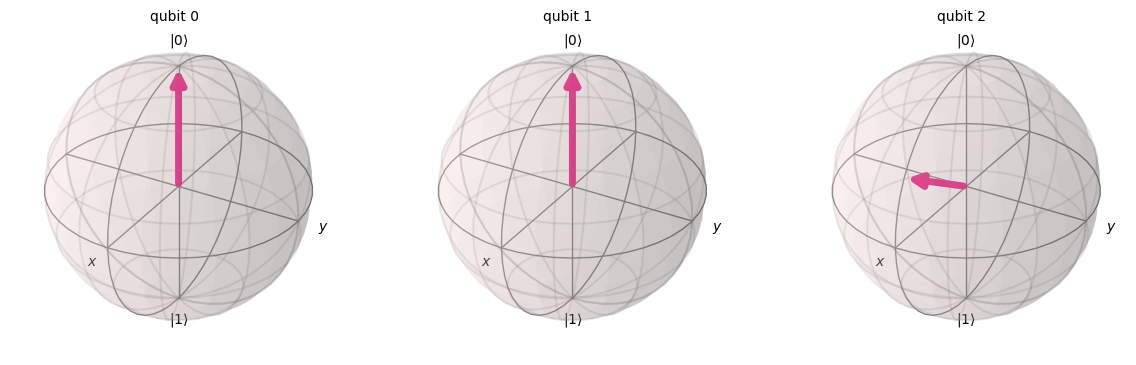

In [34]:
plot_bloch_multivector(statevector) # the qubit 2 = qB is put in the 
# original state of qt, during the porcess, the state of qt is jumbled.
